# Zircon trace element data analysis

In [113]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

If pyrolite is not installed run:

```
!pip install --upgrade pyrolite
```

In [114]:
from pyrolite.plot import pyroplot

## Import all of the data

In [115]:
all_data = pd.read_csv('../data/U_Pb/Compiled_Data.csv')

#There is one inherited grain in IR22-1 that needs to be dropped
all_data = all_data[all_data['Analysis']!='IR22-1 S 18']

all_data.columns

Index(['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U', '206Pb_cps',
       '206Pb_204Pb', '206Pb_204Pb_1s', '208Pb_232Th', '208Pb_232Th_2s',
       '207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.', '238U_206Pb', '238U_206Pb_2s', '207Pb_206Pb',
       '207Pb_206Pb_2s', '208Pb_232Th_date', '208Pb_232Th_2s_(Ma)',
       '208Pb_232Th_2s-sys_(Ma)', '207Pb_206Pb_date', '207Pb_206Pb_2s_(Ma)',
       '207Pb_206Pb_2s-sys_(Ma)', '207Pb_235U_date', '207Pb_235U_2s_(Ma)',
       '207Pb_235U_2s-sys_(Ma)', '206Pb_238U_date', '206Pb_238U_2s_(Ma)',
       '206Pb_238U_2s-sys_(Ma)', '7/6 disc._(%)', 'disc._(%)', '2s_(%)', 'P',
       'Ti', 'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', '?REE', '(Gd/Yb)cn', 'Lu/Hf',
       'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb',
       'location', 'Experiment', 'Notes']

## Export the data for plotting in isoplotr

In [116]:
isoplotr_data = all_data[['Sample','207Pb_235U', '207Pb_235U_2s', '206Pb_238U', '206Pb_238U_2s',
       'error_corr.']]
isoplotr_data = isoplotr_data[(isoplotr_data['Sample'] == 'BM22-1') | (isoplotr_data['Sample'] == 'IR22-1') ]

In [117]:
isoplotr_data.to_csv('../data/U_Pb/isoplotr_data.csv', index=False)

In [118]:
te_data  = all_data[['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U','P',
       'Ti', 'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', '?REE', '(Gd/Yb)cn', 'Lu/Hf',
       'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb']]
te_data

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,?REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb
0,BM22-1,BM22-1 L 43,970,695.0,2.080,0.717,587.0,8.01,8782.0,NaN,8.18,0.100,23.80,1.120,21.500,48.00,2.650,249.0,82.80,894.0,321.0,1304.0,247.0,2043.0,344.0,4708.0,2.270,695.0,970.0,774.0,17.52,0.07,5580.69,0.10,0.07,3.60,0.01,0.01,0.72,0.08,0.54,0.0040,0.475000
1,BM22-1,BM22-1 L 44,1161,1077.0,2.550,0.928,592.0,5.39,10465.0,NaN,12.20,0.296,64.00,1.500,28.000,52.90,4.640,289.0,93.80,1063.0,371.0,1521.0,290.0,2342.0,396.0,4404.0,3.220,1077.0,1161.0,736.0,23.57,0.11,6516.43,0.10,0.09,3.79,0.01,0.01,0.93,0.10,0.42,0.0050,0.496000
2,BM22-1,BM22-1 L 45,1605,1043.0,3.460,0.650,611.0,7.42,9618.0,NaN,7.97,0.116,24.40,1.180,20.700,44.50,2.320,255.0,83.70,970.0,358.0,1415.0,273.0,2313.0,390.0,4913.0,2.110,1043.0,1605.0,766.0,16.09,0.07,6151.22,0.09,0.08,3.77,0.00,0.01,0.65,0.11,0.51,0.0030,0.694000
3,BM22-1,BM22-1 L 46,442,160.0,0.883,0.362,248.0,3.79,1187.0,NaN,2.69,0.116,7.04,0.083,2.070,3.18,0.059,23.2,7.81,103.0,41.8,194.0,41.0,366.0,68.2,5741.0,1.370,160.0,442.0,705.0,17.58,0.02,857.26,0.05,0.01,1.96,0.01,0.02,0.36,0.13,4.84,0.0070,1.207000
4,BM22-1,BM22-1 L 48,192,55.5,0.449,0.289,173.0,3.70,762.0,NaN,1.31,NaN,3.23,0.005,0.575,1.54,0.247,10.9,4.36,63.0,25.8,124.0,29.3,272.0,51.6,6035.0,0.852,55.5,192.0,703.0,660.88,0.18,586.85,0.03,0.01,1.54,0.01,0.02,0.29,0.07,7.92,0.0050,0.705000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,OR24-2,OR24-2_L_75 z3,931,833.0,2.160,0.895,629.0,4.71,4466.0,529723.0,24.00,61.500,228.00,23.900,132.000,54.10,0.579,176.0,52.80,555.0,185.0,713.0,131.0,1072.0,165.0,7923.0,4.880,833.0,931.0,724.0,1.46,0.02,3549.87,0.14,0.02,4.91,0.03,0.03,0.89,0.19,1.77,0.0224,0.868461
178,OR24-2,OR24-2_L_86,243,95.8,0.563,0.394,192.0,2.78,1668.0,528042.0,6.53,0.033,18.10,0.107,2.670,5.93,0.073,42.8,14.90,182.0,65.0,261.0,54.4,437.0,72.0,8545.0,1.960,95.8,243.0,678.0,74.18,0.01,1156.30,0.08,0.01,3.33,0.03,0.07,0.39,0.06,5.12,0.0149,0.556513
179,OR24-2,OR24-2_M_48,515,210.0,1.220,0.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,OR24-2,OR24-2_S_31,444,217.0,1.080,0.490,260.0,6.93,2148.0,517117.0,2.75,0.050,5.73,0.192,4.140,8.75,0.116,54.4,18.60,226.0,81.4,331.0,68.5,587.0,97.1,11107.0,1.360,217.0,444.0,760.0,15.05,0.02,1482.93,0.08,0.01,2.02,0.01,0.01,0.49,0.10,5.17,0.0047,0.755701


## Comparisons to make

- Eu* anomaly
- U/Yb vs Nb/Yb
- Ti in zircon (zircon crystallization)
- Multivariate comparison between the datasets

In [119]:
color_1, color_2, color_3, color_4 = sns.color_palette('vlag', 4)
color_1

(0.52753571, 0.62574126, 0.77013939)

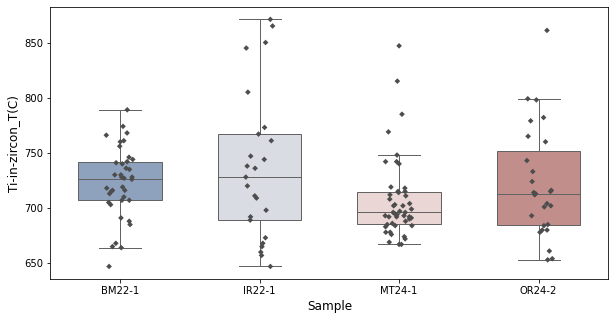

In [120]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
            width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Ti-in-zircon_T(C)',data=te_data,
              size=4, color=".3", linewidth=0)
plt.show()

<AxesSubplot:xlabel='Sample', ylabel='Eu/Eu*'>

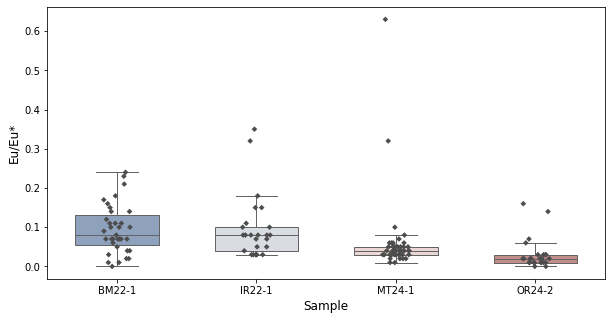

In [121]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Sample',y='Eu/Eu*',data=te_data, width=.6, palette="vlag",showfliers = False)
sns.stripplot(x='Sample',y='Eu/Eu*',data=te_data,
              size=4, color=".3", linewidth=0)

1
0.32
1
0.35
2
0.32
2
0.63


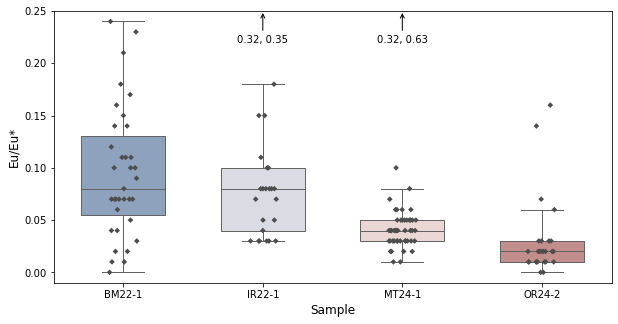

In [122]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sample', y='Eu/Eu*', data=te_data, width=.6, palette="vlag", showfliers=False)
sns.stripplot(x='Sample', y='Eu/Eu*', data=te_data, size=4, color=".3", linewidth=0)

upper_limit = 0.25
plt.ylim(-0.01, upper_limit)

# Identify the excluded points
excluded_points = te_data[(te_data['Eu/Eu*'] > upper_limit)]

# Get the unique sample names and create a mapping from sample names to numerical indices
sample_names = te_data['Sample'].unique()
sample_name_to_index = {name: index for index, name in enumerate(sample_names)}

# Add arrows and labels for the excluded points
for index, row in excluded_points.iterrows():
    
    sample_index = sample_name_to_index[row['Sample']]
    print(sample_index)
    
    value = row['Eu/Eu*']
    print(value)

sample_index = 1
plt.annotate(
        '0.32, 0.35',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')

sample_index = 2
plt.annotate(
        '0.32, 0.63',
        xy=(sample_index, upper_limit),
        xytext=(sample_index, upper_limit-0.03),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center')
    
plt.show()

In [123]:
excluded_points

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,?REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb
52,IR22-1,IR22-1 M 159,746,354.0,1.530,0.475,248.0,5.49,5624.0,NaN,4.340,0.15,19.80,1.110,19.100,36.500,8.280,175.00,54.90,638.0,220.00,882.0,176.00,1480.0,273.0,2556.0,1.090,354.0,746.0,738.0,11.89,0.32,3984.93,0.10,0.11,3.98,0.01,0.01,0.47,0.06,0.45,0.003000,0.504000
70,IR22-1,IR22-1 S 29,926,503.0,1.940,0.543,326.0,5.41,6346.0,NaN,5.060,0.07,21.10,1.030,19.600,37.100,9.890,198.00,60.90,694.0,236.00,977.0,195.00,1716.0,285.0,5534.0,1.120,503.0,926.0,736.0,19.41,0.35,4451.29,0.10,0.05,4.54,0.01,0.01,0.54,0.08,0.87,0.003000,0.540000
120,MT24-1,MT24-1_L_15,449,222.0,0.784,0.494,270.0,8.92,1637.0,478145.0,0.842,NaN,7.34,0.050,0.947,2.950,0.848,21.90,9.48,136.0,58.00,287.0,66.60,657.0,117.0,9398.0,0.413,222.0,449.0,785.0,143.63,0.32,1365.16,0.03,0.01,2.04,0.00,0.00,0.49,0.14,5.74,0.001282,0.683210
146,MT24-1,MT24-1_L_18,146,26.4,2.330,0.181,104.0,2.41,187.0,477557.0,1.200,NaN,3.67,0.007,0.200,0.716,0.341,3.79,1.19,15.4,5.86,29.3,6.65,71.1,14.5,10808.0,0.660,26.4,146.0,667.0,549.39,0.63,152.68,0.04,0.00,1.82,0.01,0.05,0.18,0.14,57.90,0.016915,2.053372


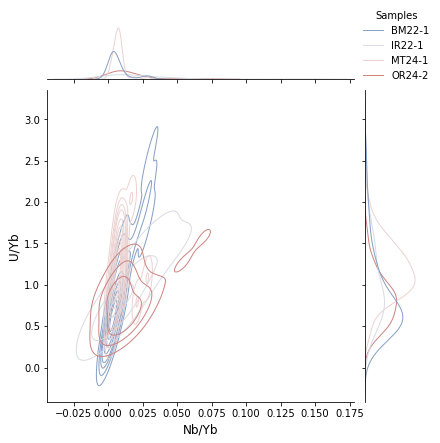

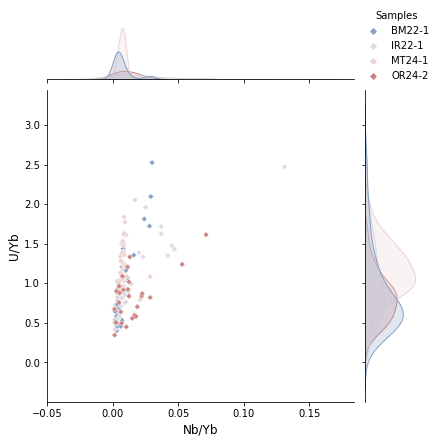

In [124]:
g = sns.jointplot(
    data=te_data,
    x="Nb/Yb", y="U/Yb", hue="Sample",
    kind="kde", palette="vlag")

sns.move_legend(g.ax_joint, "lower left", title='Samples', frameon=False)

g = sns.jointplot(
    data=te_data,
    x="Nb/Yb", y="U/Yb", hue="Sample",
    kind="scatter", palette="vlag")

sns.move_legend(g.ax_joint, "lower left", title='Samples', frameon=False)

plt.show()

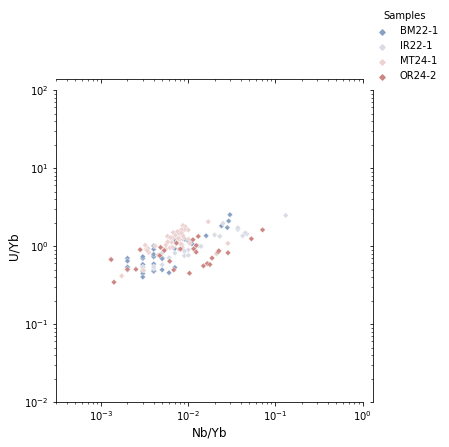

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom JointGrid with only ax_joint
g = sns.JointGrid(data=te_data, x="Nb/Yb", y="U/Yb", hue="Sample")

# Plot the scatter plot on ax_joint
sns.scatterplot(data=te_data, x="Nb/Yb", y="U/Yb", hue="Sample", palette="vlag", ax=g.ax_joint)


sns.move_legend(g.ax_joint, "lower left", title='Samples', frameon=False)

# Set log-log axes
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

# Set axis limits
g.ax_joint.set_xlim(0.0003, 1)
g.ax_joint.set_ylim(0.01, 100)

# Set non-scientific notation for axis labels
#formatter = FuncFormatter(lambda x, pos: '{:g}'.format(x))
#g.ax_joint.xaxis.set_major_formatter(formatter)
#g.ax_joint.yaxis.set_major_formatter(formatter)

plt.savefig('output/NbYb_UYb.pdf',bbox_inches='tight')
plt.show()


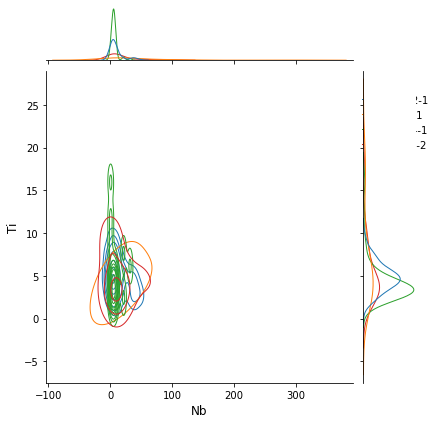

In [126]:
jp = sns.jointplot(
    data=te_data,
    x="Nb", y="Ti", hue="Sample",
    kind="kde")

## Filtering and Plotting trace element data from samples

In [127]:
te_data.columns

Index(['Sample', 'Analysis', 'U_ppm', 'Th_ppm', 'Pb_ppm', 'Th/U', 'P', 'Ti',
       'Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U',
       'Ti-in-zircon_T(C)', 'Ce/Ce*', 'Eu/Eu*', '?REE', '(Gd/Yb)cn', 'Lu/Hf',
       'Nb/Ta', 'Nb/U', 'Nb/Th', 'Th/U.1', 'Th/Y', 'Hf/Y', 'Nb/Yb', 'U/Yb'],
      dtype='object')

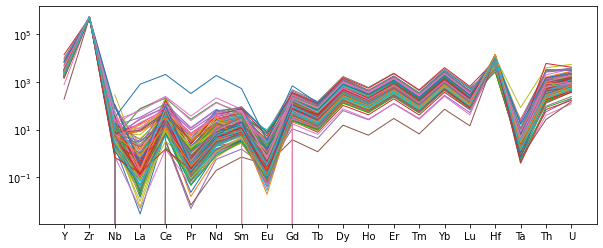

In [128]:
plt.figure(figsize=(10,4))
attributes_to_plot = ['Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U']

for i in range(te_data.shape[0]):
    
    plt.plot(attributes_to_plot, te_data[attributes_to_plot].iloc[i])
    
plt.yscale('log')

(0.0, 1.0)

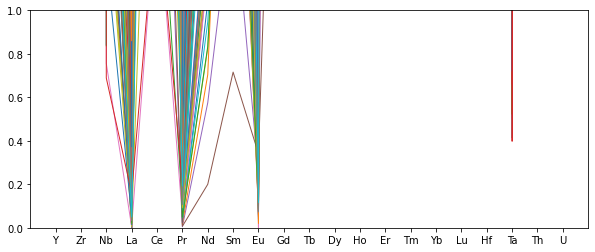

In [130]:
plt.figure(figsize=(10,4))
attributes_to_plot = ['Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U']

for i in range(te_data.shape[0]):
    
    plt.plot(attributes_to_plot, te_data[attributes_to_plot].iloc[i])

plt.ylim(0,1)

In [131]:
te_data = te_data[(te_data['La']>0) & (te_data['Pr']>0) & (te_data['Eu']>0)]
te_data.head()

,Sample,Analysis,U_ppm,Th_ppm,Pb_ppm,Th/U,P,Ti,Y,Zr,Nb,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,Th,U,Ti-in-zircon_T(C),Ce/Ce*,Eu/Eu*,?REE,(Gd/Yb)cn,Lu/Hf,Nb/Ta,Nb/U,Nb/Th,Th/U.1,Th/Y,Hf/Y,Nb/Yb,U/Yb
0,BM22-1,BM22-1 L 43,970,695.0,2.080,0.717,587.0,8.01,8782.0,NaN,8.18,0.100,23.80,1.120,21.50,48.00,2.650,249.0,82.80,894.0,321.0,1304.0,247.0,2043.0,344.0,4708.0,2.270,695.0,970.0,774.0,17.52,0.07,5580.69,0.10,0.07,3.60,0.01,0.01,0.72,0.08,0.54,0.004,0.475
1,BM22-1,BM22-1 L 44,1161,1077.0,2.550,0.928,592.0,5.39,10465.0,NaN,12.20,0.296,64.00,1.500,28.00,52.90,4.640,289.0,93.80,1063.0,371.0,1521.0,290.0,2342.0,396.0,4404.0,3.220,1077.0,1161.0,736.0,23.57,0.11,6516.43,0.10,0.09,3.79,0.01,0.01,0.93,0.10,0.42,0.005,0.496
2,BM22-1,BM22-1 L 45,1605,1043.0,3.460,0.650,611.0,7.42,9618.0,NaN,7.97,0.116,24.40,1.180,20.70,44.50,2.320,255.0,83.70,970.0,358.0,1415.0,273.0,2313.0,390.0,4913.0,2.110,1043.0,1605.0,766.0,16.09,0.07,6151.22,0.09,0.08,3.77,0.00,0.01,0.65,0.11,0.51,0.003,0.694
3,BM22-1,BM22-1 L 46,442,160.0,0.883,0.362,248.0,3.79,1187.0,NaN,2.69,0.116,7.04,0.083,2.07,3.18,0.059,23.2,7.81,103.0,41.8,194.0,41.0,366.0,68.2,5741.0,1.370,160.0,442.0,705.0,17.58,0.02,857.26,0.05,0.01,1.96,0.01,0.02,0.36,0.13,4.84,0.007,1.207
5,BM22-1,BM22-1 L 49,438,276.0,0.911,0.631,267.0,6.97,3246.0,NaN,1.75,0.070,20.00,0.559,9.45,16.00,0.782,82.6,27.00,317.0,116.0,485.0,98.2,823.0,147.0,4979.0,0.771,276.0,438.0,760.0,25.70,0.07,2143.22,0.08,0.03,2.27,0.00,0.01,0.63,0.09,1.53,0.002,0.532


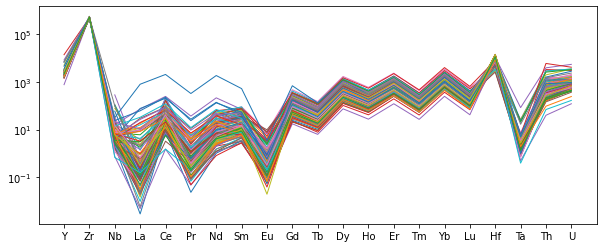

In [132]:
plt.figure(figsize=(10,4))
attributes_to_plot = ['Y', 'Zr', 'Nb', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
       'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Th', 'U']

for i in range(te_data.shape[0]):
    
    plt.plot(attributes_to_plot, te_data[attributes_to_plot].iloc[i])
    
plt.yscale('log')

C:\Users\wesle\anaconda3\lib\site-packages\pyrolite\plot\spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


(0.001, 5000)

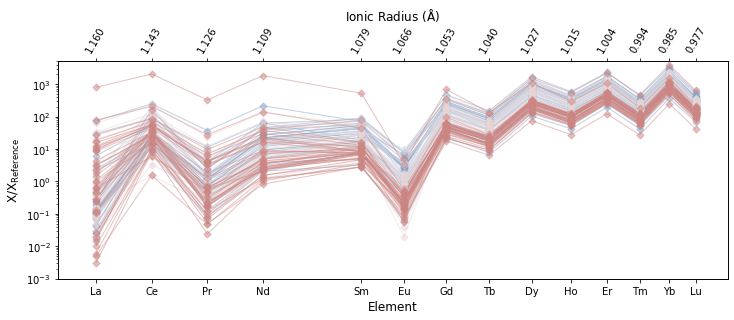

In [133]:
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(12, 4))

te_data_BM22 = te_data[te_data['Sample'] == 'BM22-1']
te_data_IR22 = te_data[te_data['Sample'] == 'IR22-1']
te_data_OR24 = te_data[te_data['Sample'] == 'OR24-2']
te_data_MT24 = te_data[te_data['Sample'] == 'MT24-1']

te_data_BM22.pyroplot.REE(ax=ax,color=color_1,alpha=0.5)
te_data_IR22.pyroplot.REE(ax=ax,color=color_2,alpha=0.5)
te_data_OR24.pyroplot.REE(ax=ax,color=color_3,alpha=0.5)
te_data_MT24.pyroplot.REE(ax=ax,color=color_4,alpha=0.5)
ax.set_ylim(.001, 5000)


C:\Users\wesle\anaconda3\lib\site-packages\pyrolite\plot\spider.py:270: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(_ymin, _ymax)


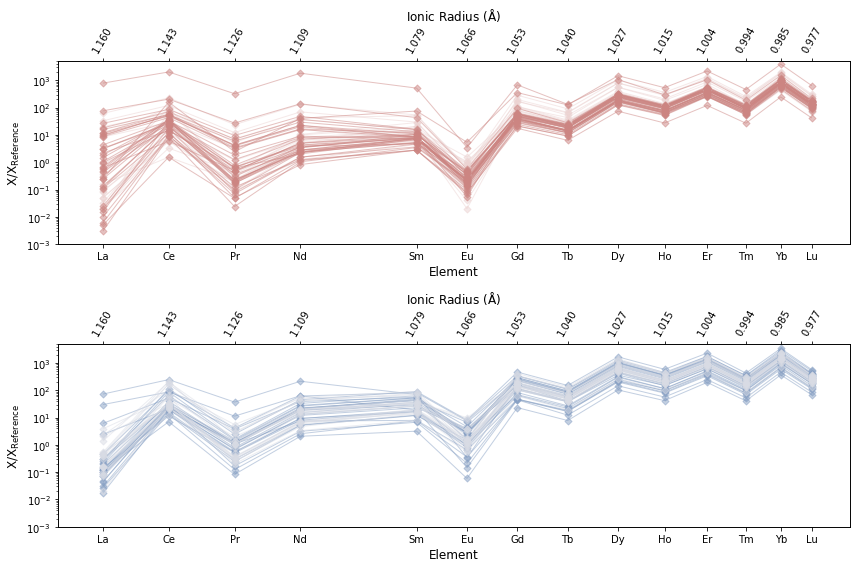

In [134]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

te_data_OR24.pyroplot.REE(ax=ax[0],color=color_3,alpha=0.5)
te_data_MT24.pyroplot.REE(ax=ax[0],color=color_4,alpha=0.5)
ax[0].set_ylim(.001, 5000)

te_data_BM22.pyroplot.REE(ax=ax[1],color=color_1,alpha=0.5)
te_data_IR22.pyroplot.REE(ax=ax[1],color=color_2,alpha=0.5)
ax[1].set_ylim(.001, 5000)

plt.tight_layout()
plt.show()